In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as pl
%matplotlib inline

# Load dataset

In [2]:
data = pd.read_csv(r"C:\Users\Ashwini\Documents\winequality-red.csv")

# Data exploration

Then I'll explore the dataset using different functions such as: head(), describe(). This step is important, because it helps me to look at and understand the dataset.

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Generate descriptive statistics 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data has only float and integer values

No variable column has null/missing values

we notice the data is clean without any null values

# Exploratory data analysis

EDA is the process where I'll look at and understand the data with statistical and visualization methods. This step will help me identifying patterns and problems in the dataset, as well as deciding which model or algorithm to use.

# Boxplot

First , I'll use the plot() function to create boxplots. This helps me detect if there are any outliers. Outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results. In the generated boxplots it is clear that: volatile acidity, citric acid and total sulfur dioxide have some outliers.

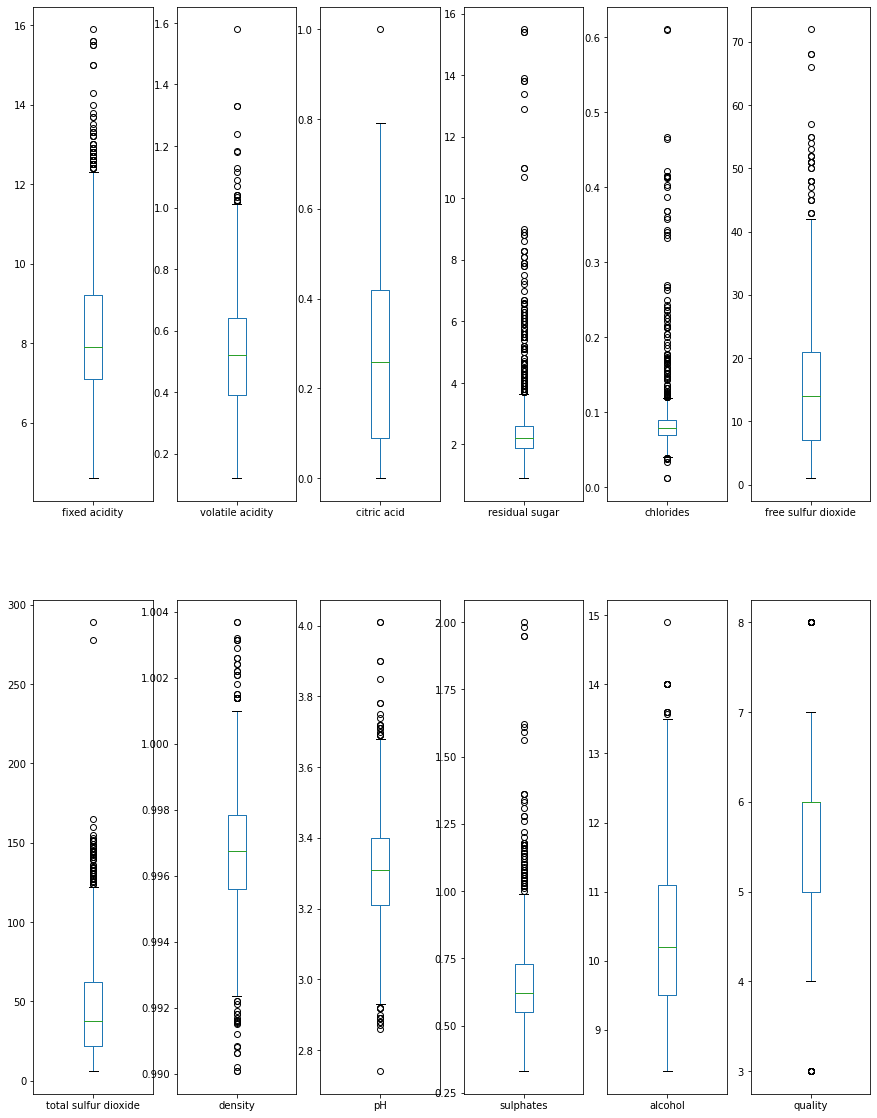

In [6]:
# Show a set of boxplots
data.plot(kind='box', subplots=True, layout=(2,6), figsize=(15,20));

# Countplot

Secondly I'll use the countplot() function to create a countplot of the quality variable. I can clearly see that the quality goes from 3 to 8, also the majority is between 5 and 6. During the data exploration(cf. 1.3) I've used the describe() function which gave me a mean of 5.636023, by rounding up the float to an integer I'll use 6 as the mean.

<AxesSubplot:xlabel='quality', ylabel='count'>

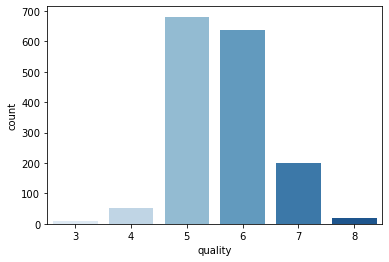

In [8]:
# Show the counts of observations
sns.countplot(x= data['quality'], palette='Blues')

# Correlation heatmap

Then I'll use the heatmap() function to create a correlation matrix. The most important things that I can deduce from the correlation matrix, which have an impact on quality, is:



1)Positive correlation between alcohol and quality


2)Negative correlation between volatile acidity and quality


<AxesSubplot:>

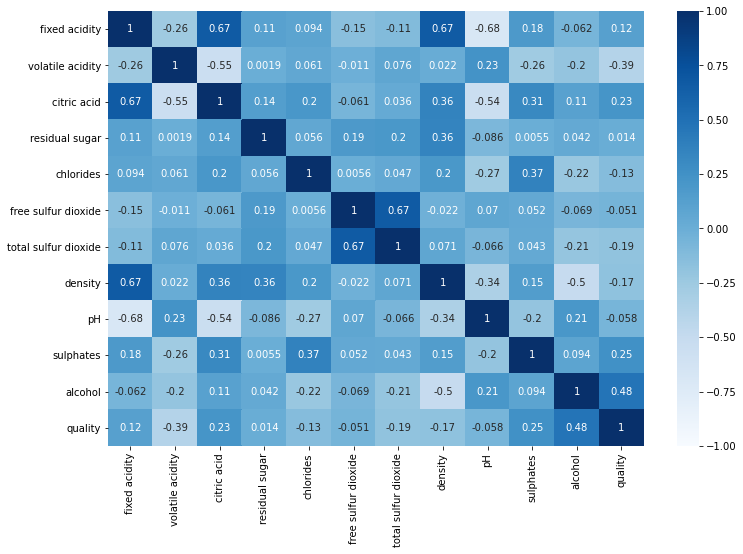

In [9]:
pl.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='Blues')

In [54]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Barplot

Lastly I'll use the barplot() function to create a barplot. The barplot will visually represent data in rectangular bars with the height of bars proportional to the value they represent. This plat is ideal for my deductions that I've made from the correlation heatmap(cf. 1.4.3). It is clear that the quality increases when there is more alcohol and that the quality decreases when there is more volatile acidity.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

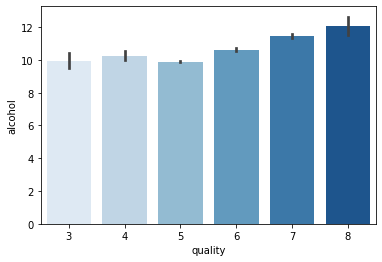

In [10]:
sns.barplot(x='quality', y='alcohol', data=data, palette='Blues')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

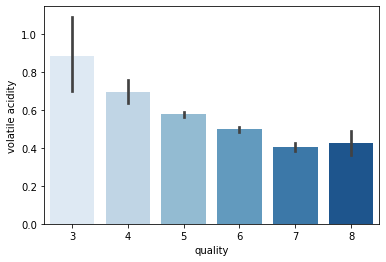

In [11]:
sns.barplot(x='quality', y='volatile acidity', data=data, palette='Blues')

In [56]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

E:\Users\Ashwini\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

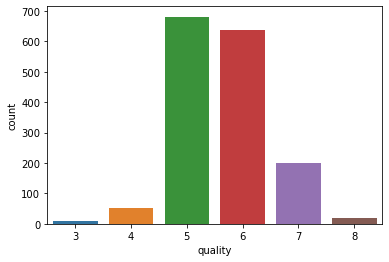

In [57]:
sns.countplot(data['quality'])

When we plot the count of quality in the data. We observe imbalance in Labels

# Pre-processing the dataset

The last step before building the ML models, I'll pre-process the data. This process refers to the manipulation or dropping of data before it is used in order to ensure or enhance performance. The DataFrame.dropna() function helps me removing missing values. To be sure that there are no missing values left, I'll use the DataFrame.isnull().sum() function.
Zero (or null) data will make the analysis more complicated. They might be labeled incorrectly as similar since they are all zeros. That is why I remove the missing values.

In [16]:
# Check if there are no missing values left
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
# Select the prediction target
y = data['quality']
# Select the features without the quality variable
X = data.drop('quality', axis=1)

# Prediction target binarization

Binarization is the process of transforming data features of any entity into vectors of binary numbers to make ML algorithms more efficient. As stated earlier, the quality goes from 3 to 8 and I chose 6 as the mean value. By binarizing the prediction target, I'll be able to tell more quickly if the wine is of good or bad quality. This means that if the quality is lower than 6, it will be considered bad quality wine and if the quality is greater than 6, it will be considered good quality wine

* 1 = Good quality wine

* 0 = Bad quality wine

In [19]:
# Binarize the prediction target
y = y.apply(lambda y: 1 if y >= 7 else 0)

# Train-Test Split

The train-test split procedure is used to estimate the performance of ML algorithms when they are used to make predictions on data not used to train the model. In order to create a validation set we want to separate both the prediction target and the features into 2 additional data sets. Which gives us 4 data sets:

1.Prediction target training data

2.Prediction target validation data

3.Feature training data

4.Feature validation data

The test size is equal to 0.2 which means that 20% of the dataset is test data. The random state is set to 0 which means that it doesn't matter how many times I'll execute the code, the result will be the same (same values in train and test datasets).



Lastly I'll use StandardScaler to scale the data.

In [20]:
# Split data into training and validation data for both features and target
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Print how many values are inside y_tr and y_test
print(y.shape, y_tr.shape, y_test.shape)

(1599,) (1279,) (320,)


In [22]:
# Print how many values are inside X_tr and X_test
print(X.shape, X_tr.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [23]:
# Standardize everything
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_test = sc.fit_transform(X_test)

# Machine learning models

Since my prediction target has been binarized, I can directly tell that I will need a classification algorithm to predict the wine quality. Classfication algorithms are used to predict the discrete values such as True or False, Spam or Not Spam or in our case 0 or 1. The 3 classification algorithms that I'll choose are:

1.Random Forest Classifier

2.Decision Tree Classifier

3.K-Nearest Neighbors

**as introduction 

*Define a model

*Fit the model

*Make predictions

*Validate the model



In the validation step you'll see three functions from Scikit-learn, namely the mean_absolute_error() and the accuracy_score().

    The MAE is a way to measure the accuracy of a given model. The value that is obtained tells us the average difference between the actual data value and the value predicted by the model. Briefly, the lower the MAE for a given model, the more closely the model is able to predict the actual values.
    
The accuracy score calculates the accuracy. It returns a float between 0 and 1 with 1 being the most accurate value.

The confusion matrix describes the performance of a classification model. It returns a 2x2 matrix.

* Bottom right: In x cases the model predicted correctly that it is good wine.

* Upper left: In x cases the model predicted correctly that it is bad wine.

* Upper right: In x cases the model predicted incorrectly that it is good wine.

* Bottom left: In x cases the model predicted incorrectly that it is bad wine.


For each model I'll implement this pattern, to make it easier I'll define this pattern in a function to make it reusable for each model. I'll call this method get_evaluations(). The output of the function will be the name of the ML model, MAE, accuracy score, confusion matrix and its prediction.

In [25]:
def get_evaluations(X_tr, X_test, y_tr, y_test):
    models = (DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier)
    index = 0
    
    for model_name in models:
        index += 1
        model = model_name()
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"%d. %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(index, model_name.__name__))
        print(confusion_matrix(y_test, prediction_val), "\n")
        print(prediction_val, "\n\n")
        
get_evaluations(X_tr, X_test, y_tr, y_test)

1. DecisionTreeClassifier -> MAE: 0.121875 -> Accuracy score: 0.878125 -> Average precision: 0.303359

[[261  29]
 [ 10  20]] 

[0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1] 


2. RandomForestClassifier -> MAE: 0.0625 -> Accuracy score: 0.9375 -> Average precision: 0.431629

[[284   6]
 [ 14  16]] 

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0

The results printed above are displayed to get a baseline idea of the performance using the default parameters during the fitting process of the models.



# Decision Tree Classifier

The first ML model that I will use is the Decision Tree Classifier. I chose for this model because it is easy to interpret. Also, the Decision Tree Classifier has a low training time. Finally, it requires less effort for data pre-processing and the data does not require to be scaled.

# Hyperparameter tuning process

During the hyperparameter tuning process I'll tune following parameters:

* max_leaf_nodes: Total number of terminal nodes (leaves) in a tree
    
* max_depth: Indicates how deep the tree can be
    
* max_features: The number of features considered for splitting a node
    

The functions are really simple. First I'll define an array of integers that represents the different values assigned to the parameters mentioned above. Then I'll loop through the array and assign the values to the function parameter. Finally I'll print the evaluations. It is exactly the same as in the get_evaluations() function used in 2. Machine learning models but I applied hyperparameter tuning.



# Max leaf nodes

The purpose of this parameter is to get an indication of how deep the tree can be.

In [26]:
def get_evaluations_max_leaf_nodes(X_tr, X_test, y_tr, y_test):  
    #list_leaf_nodes = [5, 25, 50, 100, 250, 500]
    list_leaf_nodes = [5, 10, 15, 20, 25, 30]
    
    for maximum in list_leaf_nodes: 
        model = DecisionTreeClassifier(max_leaf_nodes= maximum)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"%s leaf nodes -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(maximum))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_max_leaf_nodes(X_tr, X_test, y_tr, y_test)

5 leaf nodes -> MAE: 0.0875 -> Accuracy score: 0.9125 -> Average precision: 0.247685

[[282   8]
 [ 20  10]] 

10 leaf nodes -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.240865

[[276  14]
 [ 18  12]] 

15 leaf nodes -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.29625

[[282   8]
 [ 18  12]] 

20 leaf nodes -> MAE: 0.0875 -> Accuracy score: 0.9125 -> Average precision: 0.301282

[[278  12]
 [ 16  14]] 

25 leaf nodes -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.375

[[276  14]
 [ 12  18]] 

30 leaf nodes -> MAE: 0.103125 -> Accuracy score: 0.896875 -> Average precision: 0.314423

[[269  21]
 [ 12  18]] 



# Max depth

The purpose of this parameter is to get the total number of terminal nodes (leaves) in a tree.

In [27]:
def get_evaluations_max_depth(X_tr, X_test, y_tr, y_test):  
    #list_depths = [5, 10, 20, 30, 40, 50]
    list_depths = [3, 5, 10, 15, 10, 20]
    
    for depth in list_depths: 
        model = DecisionTreeClassifier(max_depth= depth)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"Depth: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(depth))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_max_depth(X_tr, X_test, y_tr, y_test)

Depth: 3 -> MAE: 0.084375 -> Accuracy score: 0.915625 -> Average precision: 0.208333

[[287   3]
 [ 24   6]] 

Depth: 5 -> MAE: 0.084375 -> Accuracy score: 0.915625 -> Average precision: 0.351378

[[276  14]
 [ 13  17]] 

Depth: 10 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.362216

[[267  23]
 [  9  21]] 

Depth: 15 -> MAE: 0.1125 -> Accuracy score: 0.8875 -> Average precision: 0.321105

[[264  26]
 [ 10  20]] 

Depth: 10 -> MAE: 0.125 -> Accuracy score: 0.875 -> Average precision: 0.297917

[[260  30]
 [ 10  20]] 

Depth: 20 -> MAE: 0.1125 -> Accuracy score: 0.8875 -> Average precision: 0.334375

[[263  27]
 [  9  21]] 



Let's combine the best result for the max leaf nodes and max depth! The result looks pretty good.

In [28]:
model = DecisionTreeClassifier(max_leaf_nodes=15, max_depth= 3)
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)
print(f"MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.084375 -> Accuracy score: 0.915625 -> Average precision: 0.208333

[[287   3]
 [ 24   6]] 



# Max features

The purpose of this parameter is to get the the number of features considered for splitting a node.

In [29]:
def get_evaluations_max_features(X_tr, X_test, y_tr, y_test):  
    list_features = [2, 3, 4, 5, 6, 7, 8, 9, 10]

    for feature in list_features: 
        model = DecisionTreeClassifier(max_features= feature)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"Max features: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(feature))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_max_features(X_tr, X_test, y_tr, y_test)

Max features: 2 -> MAE: 0.096875 -> Accuracy score: 0.903125 -> Average precision: 0.342922

[[270  20]
 [ 11  19]] 

Max features: 3 -> MAE: 0.134375 -> Accuracy score: 0.865625 -> Average precision: 0.23338

[[261  29]
 [ 14  16]] 

Max features: 4 -> MAE: 0.14375 -> Accuracy score: 0.85625 -> Average precision: 0.233292

[[257  33]
 [ 13  17]] 

Max features: 5 -> MAE: 0.134375 -> Accuracy score: 0.865625 -> Average precision: 0.174613

[[266  24]
 [ 19  11]] 

Max features: 6 -> MAE: 0.1375 -> Accuracy score: 0.8625 -> Average precision: 0.229257

[[260  30]
 [ 14  16]] 

Max features: 7 -> MAE: 0.115625 -> Accuracy score: 0.884375 -> Average precision: 0.249578

[[268  22]
 [ 15  15]] 

Max features: 8 -> MAE: 0.134375 -> Accuracy score: 0.865625 -> Average precision: 0.24559

[[260  30]
 [ 13  17]] 

Max features: 9 -> MAE: 0.14375 -> Accuracy score: 0.85625 -> Average precision: 0.209918

[[259  31]
 [ 15  15]] 

Max features: 10 -> MAE: 0.128125 -> Accuracy score: 0.871875 -> A

# Model with optimized parameters

We are all waiting for the result! Let's get the result from the model with default parameters first.

In [30]:
model = DecisionTreeClassifier()
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)
print(f"MAE: {mae} \t Accuracy score: {acc} \t Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.121875 	 Accuracy score: 0.878125 	 Average precision: 0.31636

[[260  30]
 [  9  21]] 



In [31]:
model = DecisionTreeClassifier(max_leaf_nodes=15, max_depth= 3, max_features=7)
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)
print(f"MAE: {mae} \t Accuracy score: {acc} \t Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.08125 	 Accuracy score: 0.91875 	 Average precision: 0.246528

[[286   4]
 [ 22   8]] 



* [x] The model looks better like that. The confusion matrix shows a better ratio. The mae decreased and the accuracy score increased which means that the model is optimized.

# Random Forest Classifier

The second model that I will use is the Random Forest Classifier. There are various reasons why I decided to choose this model. First of all it is an ensemble of decision tree algorithms. It means that this model is better than a single decision tree, because it reduces the overfitting by averaging the result. Furthermore the Random Forest Classifier is less influenced by outliers than other algorithms which results in higher accuracy. Lastly, this model works well with default parameters.

# Hyperparameter tuning process

During the hyperparameter tuning process I'll tune following parameters:

* max_depth: Indicates how deep the tree can be
    
* n_estimators: Total number of trees in the forest
    
* max_features: The number of features considered for splitting a node

# Max depth

In [34]:
def get_evaluations_max_depth_rf(X_tr, X_test, y_tr, y_test):  
    #list_depths = [5, 10, 20, 30, 40, 50]
    list_depths = [3, 5, 10, 15, 10, 20]
    
    for depth in list_depths: 
        model = RandomForestClassifier(max_depth= depth)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"Depth: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(depth))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_max_depth_rf(X_tr, X_test, y_tr, y_test)

Depth: 3 -> MAE: 0.075 -> Accuracy score: 0.925 -> Average precision: 0.282083

[[288   2]
 [ 22   8]] 

Depth: 5 -> MAE: 0.06875 -> Accuracy score: 0.93125 -> Average precision: 0.35625

[[286   4]
 [ 18  12]] 

Depth: 10 -> MAE: 0.059375 -> Accuracy score: 0.940625 -> Average precision: 0.450099

[[285   5]
 [ 14  16]] 

Depth: 15 -> MAE: 0.065625 -> Accuracy score: 0.934375 -> Average precision: 0.414764

[[283   7]
 [ 14  16]] 

Depth: 10 -> MAE: 0.065625 -> Accuracy score: 0.934375 -> Average precision: 0.404018

[[284   6]
 [ 15  15]] 

Depth: 20 -> MAE: 0.071875 -> Accuracy score: 0.928125 -> Average precision: 0.385083

[[281   9]
 [ 14  16]] 



# N estimators

In [35]:
def get_evaluations_n_estimators_rf(X_tr, X_test, y_tr, y_test):  
    list_n = [35, 40, 45, 50, 60, 70, 80, 90, 100]
    #list_n = [5, 10, 20, 30, 40, 50]
    #list_n = [3, 5, 10, 15, 10, 20]
    
    for n in list_n: 
        model = RandomForestClassifier(n_estimators= n)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"N estimators: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}  \n" %(n))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_n_estimators_rf(X_tr, X_test, y_tr, y_test)

N estimators: 35 -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.309186  

[[281   9]
 [ 17  13]] 

N estimators: 40 -> MAE: 0.059375 -> Accuracy score: 0.940625 -> Average precision: 0.450099  

[[285   5]
 [ 14  16]] 

N estimators: 45 -> MAE: 0.075 -> Accuracy score: 0.925 -> Average precision: 0.359375  

[[281   9]
 [ 15  15]] 

N estimators: 50 -> MAE: 0.071875 -> Accuracy score: 0.928125 -> Average precision: 0.361111  

[[283   7]
 [ 16  14]] 

N estimators: 60 -> MAE: 0.065625 -> Accuracy score: 0.934375 -> Average precision: 0.414764  

[[283   7]
 [ 14  16]] 

N estimators: 70 -> MAE: 0.05 -> Accuracy score: 0.95 -> Average precision: 0.544071  

[[284   6]
 [ 10  20]] 

N estimators: 80 -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.335337  

[[279  11]
 [ 15  15]] 

N estimators: 90 -> MAE: 0.0625 -> Accuracy score: 0.9375 -> Average precision: 0.431629  

[[284   6]
 [ 14  16]] 

N estimators: 100 -> MAE: 0.065625 -> Accuracy score: 

# Max features

In [36]:
def get_evaluations_max_features_rf(X_tr, X_test, y_tr, y_test):  
    list_features = [2, 3, 4, 5, 6, 7, 8, 9, 10]

    for feature in list_features: 
        model = RandomForestClassifier(max_features= feature)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"Max features: %s -> MAE: {mae} -> Accuracy score: {acc} -> -> Average precision: {avgp} \n" %(feature))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_max_features_rf(X_tr, X_test, y_tr, y_test)

Max features: 2 -> MAE: 0.0625 -> Accuracy score: 0.9375 -> -> Average precision: 0.412963 

[[286   4]
 [ 16  14]] 

Max features: 3 -> MAE: 0.071875 -> Accuracy score: 0.928125 -> -> Average precision: 0.361111 

[[283   7]
 [ 16  14]] 

Max features: 4 -> MAE: 0.059375 -> Accuracy score: 0.940625 -> -> Average precision: 0.441612 

[[286   4]
 [ 15  15]] 

Max features: 5 -> MAE: 0.075 -> Accuracy score: 0.925 -> -> Average precision: 0.384673 

[[279  11]
 [ 13  17]] 

Max features: 6 -> MAE: 0.0625 -> Accuracy score: 0.9375 -> -> Average precision: 0.431629 

[[284   6]
 [ 14  16]] 

Max features: 7 -> MAE: 0.078125 -> Accuracy score: 0.921875 -> -> Average precision: 0.359799 

[[279  11]
 [ 14  16]] 

Max features: 8 -> MAE: 0.08125 -> Accuracy score: 0.91875 -> -> Average precision: 0.335337 

[[279  11]
 [ 15  15]] 

Max features: 9 -> MAE: 0.065625 -> Accuracy score: 0.934375 -> -> Average precision: 0.4375 

[[281   9]
 [ 12  18]] 

Max features: 10 -> MAE: 0.071875 -> Accur

# Model with optimized parameters

In [37]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)
print(f"MAE: {mae} \t Accuracy score: {acc} \t Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.08125 	 Accuracy score: 0.91875 	 Average precision: 0.335337

[[279  11]
 [ 15  15]] 



In [38]:
model = RandomForestClassifier(max_depth=15, n_estimators= 35, max_features=9)
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)
print(f"MAE: {mae} \t Accuracy score: {acc} \t Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.06875 	 Accuracy score: 0.91875 	 Average precision: 0.423214

[[280  10]
 [ 12  18]] 



# K-Nearest Neighbors

The last ML model that I will use is the K-Nearest Neighbors. The reason behind this choice is purely out of curiosity to see the perfomance of this model. This model requires direcly observing of the training data elements at evaluation time which leads to slower performance.

# Hyperparameter tuning process

During the hyperparameter tuning process I'll tune following parameters:

* n_neighbors: Number of neighbors to use by default for kneighbors queries
    
* n_jobs: The number of parallel jobs to run neighbors search.
    
* weights: Weight function used in prediction.
    
* Uniform: All points in each neighborhood are weighted equally
    
* Distance: Weight points by the inverse of their distance. Closer neighbors of a query point will have a greater influence than neighbors which are further away

# N neighbors

In [39]:
def get_evaluations_n_neighbors(X_tr, X_test, y_tr, y_test):  
    list_neighbors = [2, 10, 35, 50, 80, 90, 100]

    for neighbor in list_neighbors: 
        model = KNeighborsClassifier(n_neighbors= neighbor)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"N neighbor: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp} \n" %(neighbor))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_n_neighbors(X_tr, X_test, y_tr, y_test)

N neighbor: 2 -> MAE: 0.065625 -> Accuracy score: 0.934375 -> Average precision: 0.414764 

[[283   7]
 [ 14  16]] 

N neighbor: 10 -> MAE: 0.103125 -> Accuracy score: 0.896875 -> Average precision: 0.194196 

[[278  12]
 [ 21   9]] 

N neighbor: 35 -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.309186 

[[281   9]
 [ 17  13]] 

N neighbor: 50 -> MAE: 0.08125 -> Accuracy score: 0.91875 -> Average precision: 0.270833 

[[284   6]
 [ 20  10]] 

N neighbor: 80 -> MAE: 0.0875 -> Accuracy score: 0.9125 -> Average precision: 0.207986 

[[285   5]
 [ 23   7]] 

N neighbor: 90 -> MAE: 0.084375 -> Accuracy score: 0.915625 -> Average precision: 0.22036 

[[286   4]
 [ 23   7]] 

N neighbor: 100 -> MAE: 0.078125 -> Accuracy score: 0.921875 -> Average precision: 0.253356 

[[288   2]
 [ 23   7]] 



# N jobs

In [41]:
def get_evaluations_n_jobs(X_tr, X_test, y_tr, y_test):  
    list_jobs = [2, 3, 4, 5, 6, 7, 8, 9, 100]

    for job in list_jobs: 
        model = KNeighborsClassifier(n_jobs= job)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"N jobs: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n" %(job))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_n_jobs(X_tr, X_test, y_tr, y_test)

N jobs: 2 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 3 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 4 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 5 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 6 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 7 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 8 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 9 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 

N jobs: 100 -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473

[[272  18]
 [ 14  16]] 



# Weights

In [42]:
def get_evaluations_weights(X_tr, X_test, y_tr, y_test):  
    list_weights = ["distance", "uniform"]

    for weight in list_weights: 
        model = KNeighborsClassifier(weights= weight)
        model.fit(X_tr, y_tr)
        prediction_val = model.predict(X_test)
        mae = mean_absolute_error(y_test, prediction_val)
        acc = accuracy_score(y_test, prediction_val)
        avgp = round(average_precision_score(y_test, prediction_val), 6)
        print(f"Weight: %s -> MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp} \n" %(weight))
        print(confusion_matrix(y_test, prediction_val), "\n")

get_evaluations_weights(X_tr, X_test, y_tr, y_test)

Weight: distance -> MAE: 0.075 -> Accuracy score: 0.925 -> Average precision: 0.436458 

[[275  15]
 [  9  21]] 

Weight: uniform -> MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473 

[[272  18]
 [ 14  16]] 



# Model with optimized parameters

In [43]:
model = KNeighborsClassifier(n_neighbors=35, weights="distance")
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
avgp = round(average_precision_score(y_test, prediction_val), 6)        
print(f"MAE: {mae} -> Accuracy score: {acc} -> Average precision: {avgp}\n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.078125 -> Accuracy score: 0.921875 -> Average precision: 0.321379

[[282   8]
 [ 17  13]] 



# Cross validation

Cross validation consists in training and then validating our model on several possible cuts of the train set. For example, if we cut our train set into 5 parts, we can train our model on 4 parts and then validate it on the 5th. After this stepp we will redo all this for all the possible configurations. In the end, we will take the average of the 5 scores. Between two models we can therefore choose the best one by taking the average of each model with the cross validation.



One of the best way of cross validating your model is by using GridSearchCV. It builds a model grid with all the combinations of hyperparameters present in param_grid. I wrote the code for the GridSearchCV, but didn't get any result printed, because it takes a lot of time before revealing the values.

# Average precision

In [44]:
cvs_dt = cross_val_score(DecisionTreeClassifier(max_leaf_nodes=15, max_depth= 2, max_features=10), X_tr, y_tr, cv=5, scoring="average_precision").mean()
print(f"Decision Tree: {cvs_dt} ")

Decision Tree: 0.3682367986710851 


In [45]:
cvs_rf = cross_val_score(RandomForestClassifier(max_depth=15, n_estimators= 35, max_features=9), X_tr, y_tr, cv=5, scoring="average_precision").mean()
print(f"Random Forest: {cvs_rf} ")

Random Forest: 0.6637534311657977 


In [46]:
cvs_knn = cross_val_score(KNeighborsClassifier(n_neighbors=35, weights="distance"), X_tr, y_tr, cv=5, scoring="average_precision").mean()
print(f"K-Nearest Neighbors: {cvs_knn}")

K-Nearest Neighbors: 0.6949513904541312


# Accuracy

In [47]:
cvs_dt = cross_val_score(DecisionTreeClassifier(max_leaf_nodes=15, max_depth= 2, max_features=10), X_tr, y_tr, cv=5, scoring="accuracy").mean()
print(f"Decision Tree: {cvs_dt} ")

Decision Tree: 0.8569485294117648 


In [48]:
cvs_rf = cross_val_score(RandomForestClassifier(max_depth=15, n_estimators= 35, max_features=9), X_tr, y_tr, cv=5, scoring="accuracy").mean()
print(f"Random Forest: {cvs_rf} ")

Random Forest: 0.8975980392156864 


In [49]:
cvs_knn = cross_val_score(KNeighborsClassifier(n_neighbors=35, weights="distance"), X_tr, y_tr, cv=5, scoring="accuracy").mean()
print(f"K-Nearest Neighbors: {cvs_knn}")

K-Nearest Neighbors: 0.8905484068627452


The Scikit-learn documentation explains that there are different approaches to assess the quality of a model's predictions. So I evaluated my models based on these APIs.

First, I've used metric functions which assesses a prediction error for specific purposes. Various metrics were used, such as:

* Classification metrics: Average precision, Accuracy and Confusion Matrix
    
* Regression metrics: Mean Absolute Error
    
I started with an implementation that used the default parameters. This gave me a baseline to be able to compare with my future results. During this phase, I was able to conclude that some models performed better than others.

The Random Forest Classifier and the K Nearest Neighbors had a better score than the Decision Tree Classifier. However Random Forest performs better than the K Nearest Neighbor. These were the results that were generated using the default parameters.


1.DecisionTreeClassifier

MAE: 0.121875 -> Accuracy score: 0.878125 -> Average precision: 0.303359
            
[[261  29] [ 10  20]]


2.RandomForestClassifier
MAE: 0.0625 -> Accuracy score: 0.9375 -> Average precision: 0.431629
            

[[284   6][ 14  16]] 


3.KNeighborsClassifier

MAE: 0.1 -> Accuracy score: 0.9 -> Average precision: 0.29473
[[272  18][ 14  16]]




After the process of using the default parameters. I tried to optimize my models using hyperparameter tuning. I decided to choose 3 parameters, by reading the Scikit-learn documentation, for each model. As you have certainly seen, this hypertuning process really helped me optimize my models. These were the results that were generated using the optimized parameters.

1.DecisionTreeClassifier

MAE: 0.09375 	 Accuracy score: 0.90625 
        
[[283   7][ 23   7]] 

2.RandomForestClassifier

MAE: 0.071875 	 Accuracy score: 0.928125 

[[281   9][ 14  16]] 


3.KNeighborsClassifier

MAE: 0.078125 -> Accuracy score: 0.921875 
    
[[282   8][ 17  13]] 



The second and last approach that I've used to assess the quality of my model's predictions is the scoring parameter which is a tool that uses cross validation. For that part, I implemented the cross_val_score() function which evaluates the score by cross-validation.

The cross validation was not what I expected. I thought that by using the best values for my hyperparameters, I would have a better accuracy. Unfortunately there is only my average precision which has improved very well. I think this is not a bad sign. Also I noticed that my accuracy increased during cross validation by changing the values of my parameters again.

# Results models with optimized parameters

# Decision Tree Classifier

In [50]:
model = DecisionTreeClassifier(max_leaf_nodes=15, max_depth= 3, max_features=7)
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
print(f"MAE: {mae} \t Accuracy score: {acc} \n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.09375 	 Accuracy score: 0.90625 

[[283   7]
 [ 23   7]] 



# Random Forest Classifier

In [51]:
model = RandomForestClassifier(max_depth=15, n_estimators= 35, max_features=9)
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
print(f"MAE: {mae} \t Accuracy score: {acc} \n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.071875 	 Accuracy score: 0.928125 

[[281   9]
 [ 14  16]] 



# K-Nearest Neighbors

In [52]:
model = KNeighborsClassifier(n_neighbors=35, weights="distance")
model.fit(X_tr, y_tr)
prediction_val = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction_val)
acc = accuracy_score(y_test, prediction_val)
print(f"MAE: {mae} -> Accuracy score: {acc} \n")
print(confusion_matrix(y_test, prediction_val), "\n")

MAE: 0.078125 -> Accuracy score: 0.921875 

[[282   8]
 [ 17  13]] 

